In [28]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import ast
from shapely.geometry import shape, Point

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import libpysal as lp
from splot.mapping import vba_choropleth
import seaborn as sns
%matplotlib inline

In [4]:
data_file = '../data/shp_files/block_groups.shp'
block_groups = gpd.read_file(data_file)
block_groups['GEOID'] = block_groups['GEOID'].astype('int')
block_groups.head()

,GEOID,NAME,num_stops,total_hh,pct_hh_pov,total_pop,working_a,pct_white,pct_black,oth_race,...,pct_car,pct_walk,oth_mode,pct_trans,pct_hisp,employed,veh_pp,density,interact,geometry
0,170318088001,"Block Group 1, Census Tract 8088, Cook County,...",6.0,788.0,0.109137,1738.0,0.579977,0.884925,0.040276,0.074799,...,0.561662,0.080429,0.048257,0.309651,0.037975,0.512083,0.453395,3.540156,1.857909,"POLYGON ((-87.70273 42.06899, -87.70224 42.068..."
1,170318088002,"Block Group 2, Census Tract 8088, Cook County,...",7.0,601.0,0.123128,1994.0,0.725176,0.838516,0.019559,0.141926,...,0.587671,0.119178,0.019178,0.273973,0.040622,0.430792,0.301404,2.819540,1.917808,"POLYGON ((-87.68923 42.06877, -87.68285 42.069..."
2,170318092002,"Block Group 2, Census Tract 8092, Cook County,...",12.0,510.0,0.333333,1210.0,0.702479,0.336364,0.516529,0.147107,...,0.430131,0.146288,0.069869,0.353712,0.247934,0.497521,0.421488,4.580260,4.244541,"POLYGON ((-87.69737 42.05211, -87.69729 42.055..."
3,170318092004,"Block Group 4, Census Tract 8092, Cook County,...",14.0,281.0,0.313167,945.0,0.625397,0.165079,0.695238,0.139683,...,0.757143,0.117143,0.102857,0.022857,0.050794,0.413757,0.297354,4.743083,0.320000,"POLYGON ((-87.70943 42.04840, -87.70886 42.052..."
4,170318092001,"Block Group 1, Census Tract 8092, Cook County,...",14.0,308.0,0.379870,847.0,0.742621,0.200708,0.774498,0.024793,...,0.936508,0.027778,0.035714,0.000000,0.214876,0.362456,0.363636,5.102042,0.000000,"POLYGON ((-87.70354 42.05374, -87.70043 42.053..."


In [7]:
block_groups.columns

Index(['GEOID', 'NAME', 'num_stops', 'total_hh', 'pct_hh_pov', 'total_pop',
       'working_a', 'pct_white', 'pct_black', 'oth_race', 'long_com',
       'pct_car', 'pct_walk', 'oth_mode', 'pct_trans', 'pct_hisp', 'employed',
       'veh_pp', 'density', 'interact', 'geometry'],
      dtype='object')

In [9]:
REAL_COLNAMES = {
    'working_a': 'pct_working_age',
    'long_com': 'pct_long_commute',
    'employed': 'pct_employed',
    'pct_trans': 'pct_public_transit',
     'veh_pp': 'veh_per_capita'
}

cleaned = block_groups.rename(columns=REAL_COLNAMES)

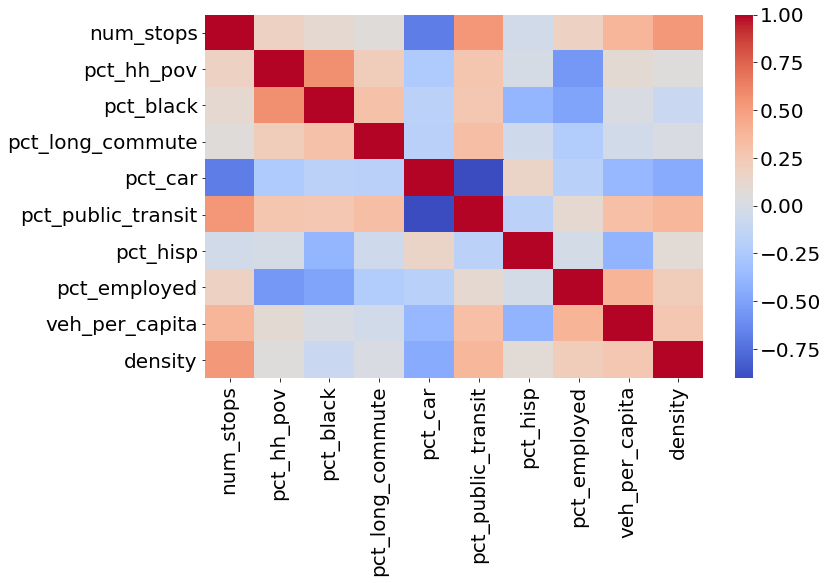

In [14]:
regressors = ['num_stops', 'pct_hh_pov', 'pct_black',
              'pct_long_commute', 'pct_car', 'pct_public_transit',
              'pct_hisp', 'pct_employed', 'veh_per_capita',
              'density']     

fig, ax = plt.subplots(figsize=(12, 8.5))
sns.heatmap(cleaned[regressors].corr(), ax=ax, cmap='coolwarm')
plt.tight_layout()
plt.rcParams.update({'font.size': 20})
plt.savefig("heatmap.png")

In [ ]:
L_stops = '../data/CTA_-_System_Information_-_List_of__L__Stops.csv'
el_df = pd.read_csv(L_stops)
el_df['Location']= el_df['Location'].apply(lambda x: ast.literal_eval(x))  
el_df['geometry'] = el_df['Location'].apply(lambda x: Point(x[1], x[0]))
L_stops_gdf = gpd.GeoDataFrame(el_df, geometry='geometry')
L_stops_gdf = L_stops_gdf[L_stops_gdf.geometry.notnull()]

In [ ]:
COLOR_RENAME ={
    'RED': '#CF0A2C',
    'BLUE': '#00A1DE',
    'G': '#009B2A',
    'BRN': '#62361B',
    'P': '#542E91',
    'Pexp': '#542E91',
    'Y': '#F9E300',
    'Pnk': '#E27EA6',
    'O': '#FF4612'
}
L_stops_gdf['line_color'] = L_stops_gdf[['RED', 'BLUE', 'G', 'BRN',
                                         'P', 'Pexp', 'Y', 'Pnk', 'O']].idxmax(1)
L_stops_gdf.replace(COLOR_RENAME, inplace=True)
L_stops_gdf.drop_duplicates(subset=['STATION_NAME', 'line_color'], inplace=True)
L_stops_gdf.head()

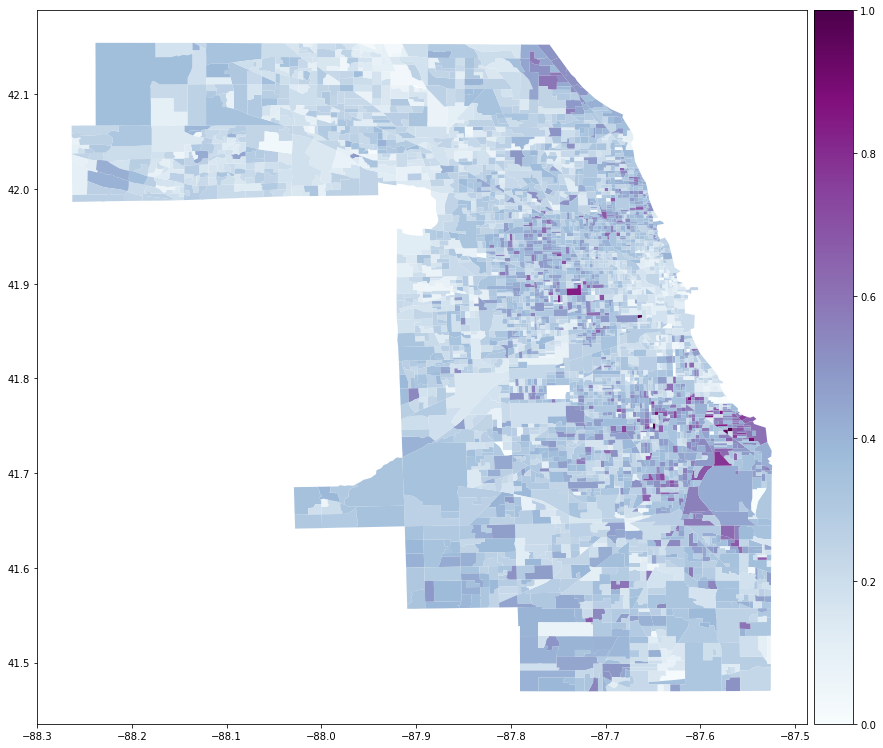

In [135]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18.5, 10.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cleaned.plot(column='pct_long_commute', ax=ax, legend=True, cax=cax, cmap='BuPu')
plt.tight_layout()
plt.savefig('long_commute.png')

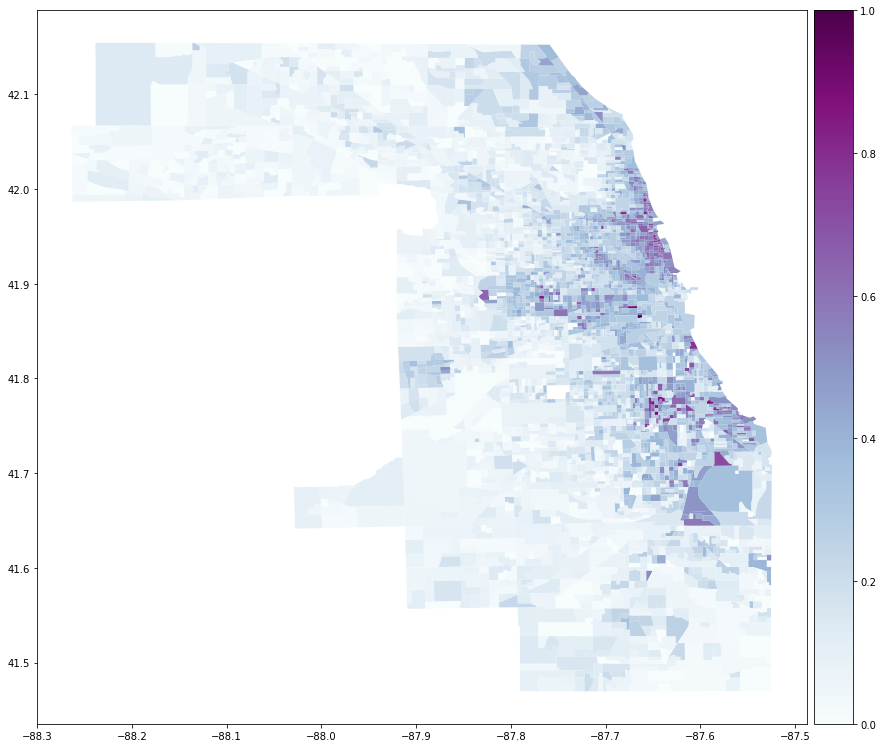

In [134]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18.5, 10.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cleaned.plot(column='pct_public_transit', ax=ax, legend=True, cax=cax, cmap='BuPu')
plt.tight_layout()
plt.savefig('pct_transit.png')

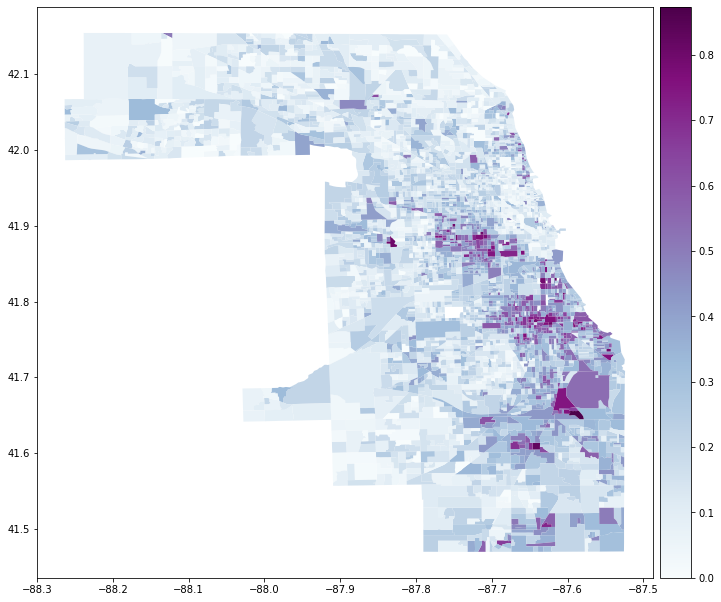

In [124]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18.5, 10.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cleaned.plot(column='pct_hh_pov', ax=ax, legend=True, cax=cax, cmap='BuPu')
plt.savefig('pct_poverty.png')

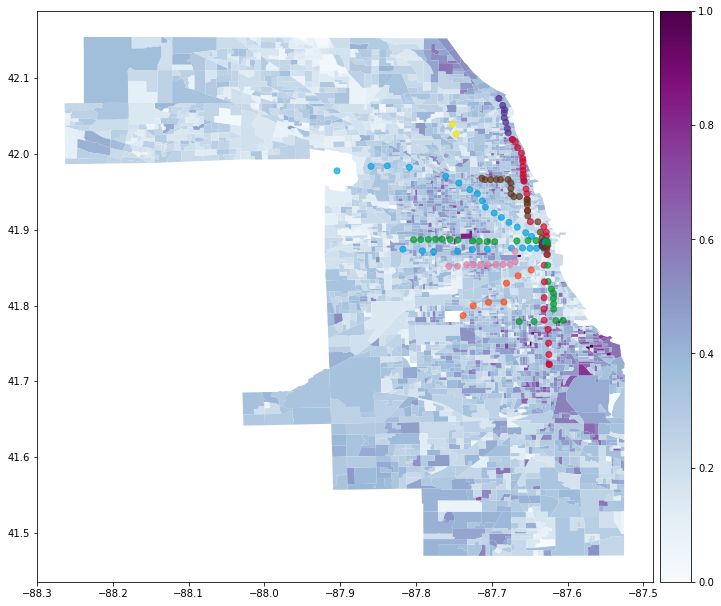

In [123]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18.5, 10.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cleaned.plot(column='pct_long_commute', ax=ax, legend=True, cax=cax, cmap='BuPu')
L_stops_gdf.plot(ax=ax, color=L_stops_gdf['line_color'], alpha=0.7)
plt.savefig('long_commute_with_el.png')

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


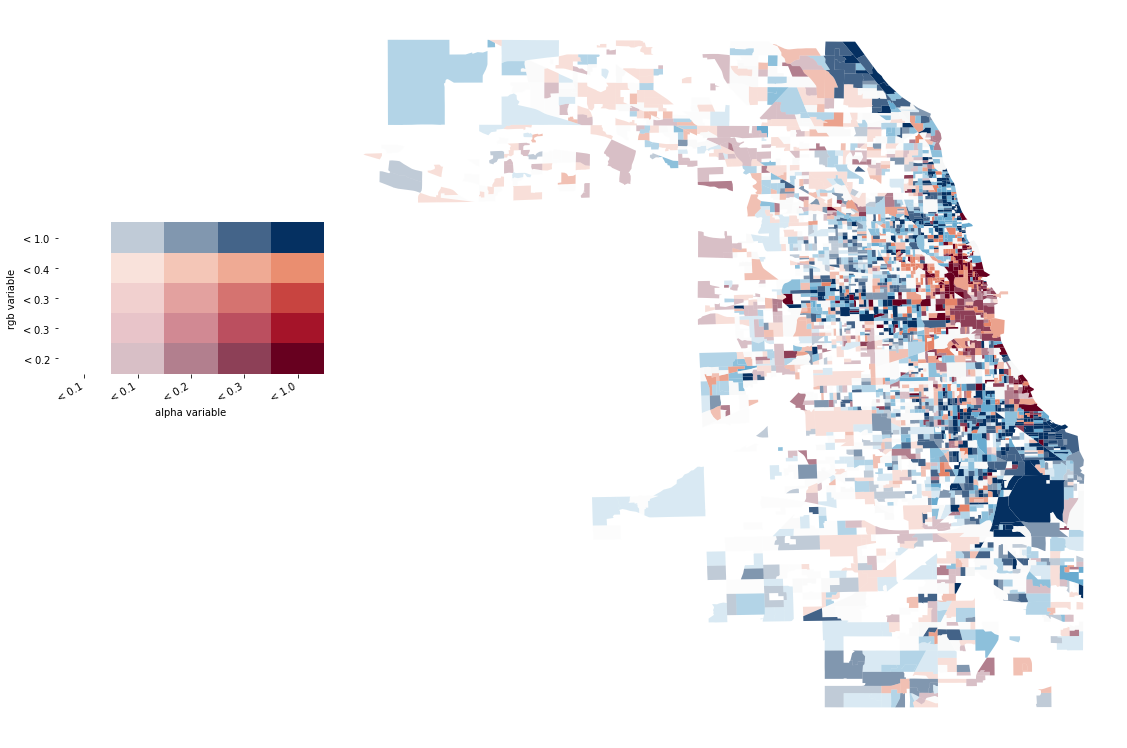

In [119]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18.5, 10.5)
vba_choropleth('pct_long_commute', 'pct_public_transit', cleaned.dropna(),  ax=ax, legend=True,
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               rgb_mapclassify=dict(classifier='quantiles', k=5),
              cmap='RdBu')
plt.tight_layout()